# Importing Dependencies

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tabulate import tabulate
from sklearn import metrics
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    learning_curve,
    GridSearchCV,
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

df = pd.read_csv("C:\\Users\\tissi\\Downloads\\SENHEISER2.csv")

- **Scikit-learn** commonly referred to as **sklearn**, is an open-source machine learning library for the Python programming language. It provides simple and efficient tools for data analysis and modeling, including various machine learning algorithms for tasks such as classification, regression, clustering, dimensionality reduction, and more.
- **collections**: provides specialized data structures that are alternatives to the built-in types like lists, tuples, and dictionaries.
    - **Counter**: dictionary subclass for counting hashable objects. It's often used to count the occurrences of elements in a list or any other iterable.
- **tabulate**:  library for creating nicely formatted tables using a variety of output formats 

# Label Encoding

Label encoding is a preprocessing technique used to convert categorical data into numerical format, allowing machine learning algorithms to work with this type of data. In label encoding, each unique category in a categorical variable is assigned a unique integer. This process helps in representing categories in a way that machine learning models can understand.

In the provided script, the *LabelEncoder* from scikit-learn is used to perform label encoding on the 'Sentiment' column in the DataFrame. This column contains categorical values such as positive, negative, or neutral sentiments. 

The *fit_transform* method of LabelEncoder fits the encoder to the unique values in the 'Sentiment' column and transforms these values into corresponding integers.

For example, if the 'Sentiment' column initially had values like 'positive,' 'neutral,' and 'negative,' label encoding will convert them to 2, 0, and 1, respectively. This numeric representation enables machine learning models to work with the sentiment information during training.

In [4]:
# Encoding the sentiment to have a target numerical variable
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Sentiment'])

# Split the data into X (Full Review) and Y (Target)
X = df['Full Review']
Y = df['Target']

In [5]:
df['Target'].value_counts()

Target
2    60
0    27
1    13
Name: count, dtype: int64

Pretty imbalanced dataset

# Text Embedding

Text embedding is a technique used in natural language processing (NLP) to represent words, phrases, or entire documents as numerical vectors in a continuous vector space. It involves mapping words or text sequences from a high-dimensional space (vocabulary) to a lower-dimensional space, where each word or sequence is represented by a fixed-size vector of real numbers. The goal is to capture semantic relationships and contextual information, enabling machine learning models to understand the meaning and context of words or phrases.

In sentiment analysis, text embedding is useful for several reasons:

Embeddings capture the semantic meaning of words and phrases, allowing models to understand context and sentiment nuances.

Text embedding reduces the dimensionality of the input space, making it computationally more efficient and often improving model performance.

# TF-IDF

**TF-IDF** stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents, often a larger corpus. TF-IDF is commonly used in information retrieval and text mining.



$$
\mathbf{W}_{x,y} = \text{tf}_{x,y} \times \text{log}\left(\frac{N}{\mathbf{df}_x}\right) 
$$

<div class="text-left">

- ${W}_{x,y}$ :  is word x within review y
- ${tf}_{x,y}$ : is the frequency of x in y
- ${N}$ :        is the total number of reviews
- ${df}_x$ :     is the number of review containing x

</div>

The TF-IDF score helps in identifying important words in a document relative to the entire corpus. Words that are common in a document but rare in the entire corpus receive higher TF-IDF scores and are often considered more significant for that document.

This technique is widely used in tasks such as document retrieval, text mining, and information retrieval to identify key terms and assess their importance in a given context.

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(df['Full Review'])

In [7]:
X.shape

(100, 5000)

In [8]:
#Getting the target variable(encoded)
y=df['Target']

In [9]:
X.toarray()

array([[0.        , 0.06781522, 0.07242861, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.067815,0.072429,0.000000,0.0,0.000000,0.000000,0.000000,0.067815,0.0,...,0.0,0.000000,0.0,0.0,0.054811,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.035603,0.0,0.032924,0.042057,0.000000,0.000000,0.0,...,0.0,0.042057,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.060380,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.078866,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
96,0.0,0.000000,0.000000,0.000000,0.0,0.174628,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
97,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
98,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Each document in thr dataset is represented as a vector of TF-IDF values for individual terms or n-grams (word combinations). The TF-IDF values capture the importance of each term within each document and across the entire corpus.

These TF-IDF vectors effectively embed the text data in a high-dimensional space, where each dimension corresponds to a unique term or n-gram. This type of text representation is commonly used in natural language processing (NLP) tasks, including sentiment analysis

X_train_tvec and X_test_tvec are the TF-IDF representations of the training and testing text data, respectively. Each row in these matrices corresponds to a document, and each column corresponds to a specific term or n-gram. The values in the matrix represent the TF-IDF scores for each term in the corresponding document.

# SMOTE

In the context of machine learning, dealing with imbalanced datasets is crucial because it can significantly impact the performance of a model. 

Imbalanced datasets can lead machine learning models to be biased toward the majority class. Models trained on imbalanced datasets may have poor performance in predicting the minority class, as they tend to prioritize the majority class due to its prevalence.

An imbalanced dataset occurs when the distribution of classes in the target variable is not uniform, as we saw in the variable 'Target'. This is why I applied the SMOTE technique.

SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique used in machine learning to address the issue of imbalanced datasets.


In [11]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 60, 0: 27, 1: 13})
Resampled dataset shape Counter({2: 60, 1: 60, 0: 60})


In [12]:
# Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

# CONFUSION MATRIX

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

A confusion matrix is a table used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm by breaking down the number of correct and incorrect predictions into different categories.

Here's a brief explanation of the terms used in a confusion matrix:

- True Positive (TP): The number of observations that were correctly predicted as positive.
- True Negative (TN): The number of observations that were correctly predicted as negative.
- False Positive (FP): The number of observations that were incorrectly predicted as positive.
- False Negative (FN): The number of observations that were incorrectly predicted as negative.

# MODELS EVALUATION

In [14]:
# Creating the objects
logreg= LogisticRegression(random_state=0)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = BernoulliNB()
svm = SVC()
rf = RandomForestClassifier()

cv = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'KNN', 3: 'Naive Bayes', 4: 'SVM', 5: 'Random Forest'}

# List of models
cv_models = [logreg, dt, knn, nb, svm, rf]

results = []

# Evaluate each model
for i, model in enumerate(cv_models):
    # Cross-validated accuracy
    accuracy = cross_val_score(model, X_res, y_res, cv=10, scoring='accuracy').mean()

    results.append([cv[i], accuracy])

headers = ["Model", "Test Accuracy"]
print(tabulate(results, headers=headers, tablefmt="heavy_grid"))

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Model               ┃   Test Accuracy ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━┫
┃ Logistic Regression ┃        0.966667 ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━┫
┃ Decision Tree       ┃        0.755556 ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━┫
┃ KNN                 ┃        0.594444 ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━┫
┃ Naive Bayes         ┃        0.85     ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━┫
┃ SVM                 ┃        0.938889 ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━┫
┃ Random Forest       ┃        0.872222 ┃
┗━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━┛


Cross-validation is a technique used in machine learning to assess the performance of a model by splitting the dataset into multiple subsets, training the model on some of these subsets, and evaluating it on the remaining subsets. The idea is to use different parts of the data for both training and testing to get a more reliable estimate of the model's performance.

In scikit-learn, the cross_val_score function is commonly used to perform cross-validation. It takes a model, a dataset, and the number of folds (or cross-validation splits), 10 in this case, as parameters. The dataset is divided into 'k' folds, and the model is trained and evaluated 'k' times, each time using a different fold for testing and the remaining folds for training. The function returns an array of scores from each iteration.

From what we can gather from this table the Logistic Regression Model correctly predicted the outcome for 96% of the instances in the test dataset while KNN is the least performing model.

While test accuracy is a commonly used metric, it may not be sufficient, additional metrics like precision, recall, and F1 score are often considered to provide a more comprehensive evaluation of the model's performance.

In [15]:
# Results table headers
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

results = []

# Fit and evaluate each model
for i, model in enumerate(cv_models):
    model.fit(X_res, y_res)
    model_name = cv[i]
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append([model_name, accuracy, precision, recall, f1])

print(tabulate(results, headers=headers, tablefmt="heavy_grid"))


┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Model               ┃   Accuracy ┃   Precision ┃   Recall ┃   F1 Score ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ Logistic Regression ┃   1        ┃    1        ┃ 1        ┃   1        ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ Decision Tree       ┃   1        ┃    1        ┃ 1        ┃   1        ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ KNN                 ┃   0.644444 ┃    0.749074 ┃ 0.607843 ┃   0.534773 ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ Naive Bayes         ┃   0.911111 ┃    0.932026 ┃ 0.918954 ┃   0.913428 ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ SVM                 ┃   1        ┃    1        ┃ 1        ┃   1        ┃
┣━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ Random Forest       ┃  

Accuracy measures the overall correctness of the model by calculating the ratio of correctly predicted instances to the total instances.

        Accuracy = (True Positives + True Negatives) / Total Number of Samples

Precision focuses on the accuracy of positive predictions. It measures the ratio of correctly predicted positive observations to the total predicted positives.F
 
        Precision = (True Positives) / (True Positives + False Positives)

The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, considering both false positives and false negatives.

        F1 Score = (2 x Precision x Recall) / (Precision + Recall)

Recall is a metric that quantifies the ability of a classification model to capture all the relevant instances or positive samples.

        Recall = (True Positives) / (True Positives + False Negatives)





These metrics confirmed that KNN is the worst model. The other models overfit the training data.

Let's if something will change after fine tuning the model.

# LOGISTIC REGRESSION

In [16]:
param_grid = {'C': np.logspace(-4, 4, 50),
              'penalty': ['l2']}

clf = GridSearchCV(LogisticRegression(random_state=0, solver='lbfgs'), param_grid, cv=5, verbose=0, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

print("Best Logistic Regression Model:")
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test, y_test))

Best Logistic Regression Model:
LogisticRegression(C=1.2067926406393288, random_state=0)
The mean accuracy of the model is: 0.9555555555555556


Confusion matrix


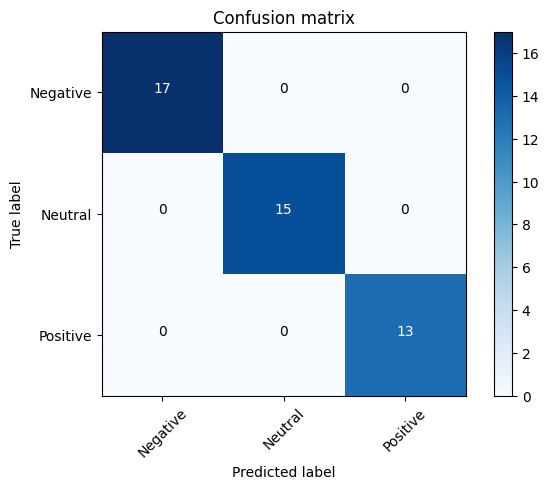

In [17]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

Logistic Regression classify perfectly positive, neutral and negative reviews

# DECISION TREE

In [18]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, cv=5, verbose=0, n_jobs=-1)
best_model_dt = clf_dt.fit(X_train, y_train)
print("Decision Tree - Best Parameters:", best_model_dt.best_params_)
print("Decision Tree - Mean Accuracy:", best_model_dt.score(X_test, y_test))

Decision Tree - Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree - Mean Accuracy: 0.7111111111111111


Confusion matrix


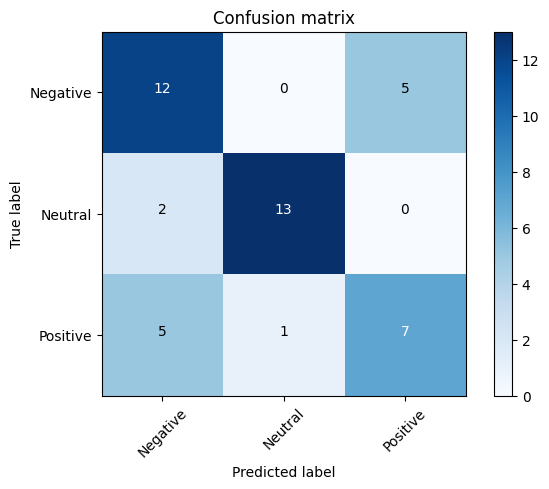

In [19]:
best_model_dt = clf_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred_dt)

plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'])

Decision Tree is better at classifying negative and neutral reviews than positive ones. We have some instances of reviews classified as negative and positive where they should have been positive and negative, respectively

# K NEAREST NEIGHBOUR

In [20]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

clf_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=0, n_jobs=-1)
best_model_knn = clf_knn.fit(X_train, y_train)
print("KNN - Best Parameters:", best_model_knn.best_params_)
print("KNN - Mean Accuracy:", best_model_knn.score(X_test, y_test))

KNN - Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
KNN - Mean Accuracy: 0.6444444444444445


Confusion matrix


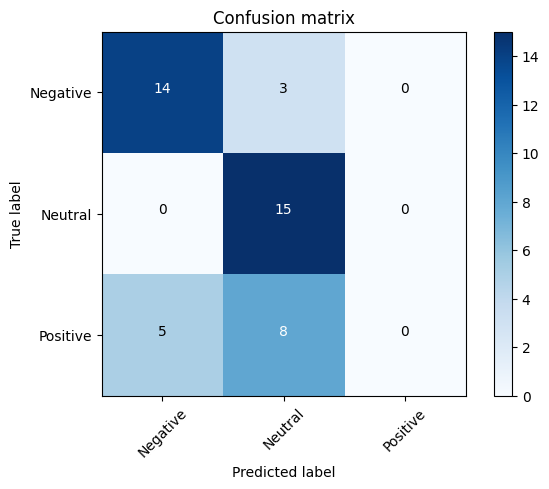

In [21]:
best_model_knn = clf_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)

plot_confusion_matrix(cm_knn, classes=['Negative', 'Neutral', 'Positive'])

KNN, like Decision Tree, better classifies negative and neutral reviews. Given the low accuracy values, we are not surprised to see that not even one positive review was correctly classified.

# NAIVE BAYES

In [22]:
nb.fit(X_train, y_train)
print("Naive Bayes (BernoulliNB) - Accuracy:", nb.score(X_test, y_test))

Naive Bayes (BernoulliNB) - Accuracy: 0.8222222222222222


Confusion matrix


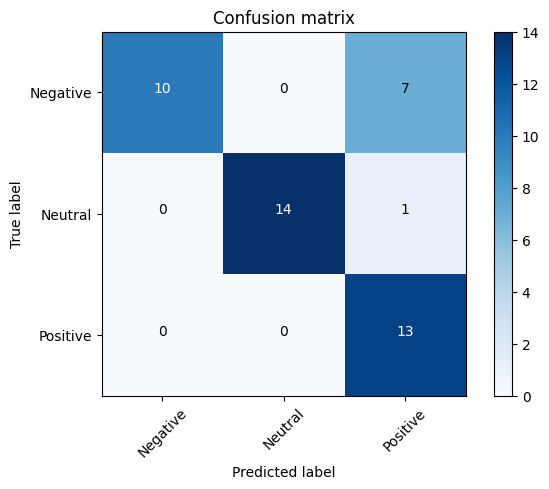

In [23]:
y_pred_nb = nb.predict(X_test)

cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)

plot_confusion_matrix(cm_nb, classes=['Negative', 'Neutral', 'Positive'])

**Insight**: I've chosen to use Bernoulli Naive Bayes due to the small size of my dataset, as it is less sensitive to irrelevant features. Alternatively, I would opt for Gaussian Naive Bayes when working with a larger dataset

Gaussian Naive Bayes generally classifies all types of reviews well, but there are instances of negative reviews being wrongly classified as positive

# RANDOM FOREST

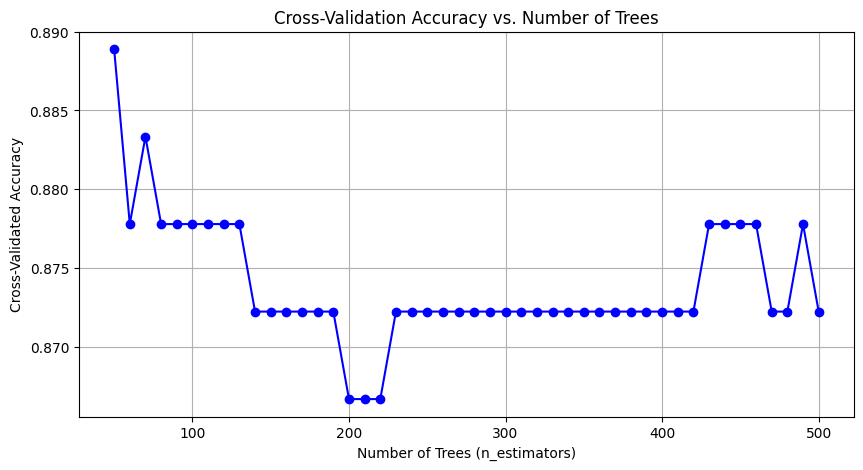

Optimal number of trees: 60


In [24]:
cv_scores = []

min_estimators = 50
max_estimators = 500


for i in range(min_estimators, max_estimators + 1, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    
    # Perform cross-validation with 5 folds
    scores = cross_val_score(rf, X_res, y_res, cv=5, scoring='accuracy')
    
    cv_scores.append(np.mean(scores))

# Plot the cross-validated scores against the number of trees
plt.figure(figsize=(10, 5))
plt.plot(range(min_estimators, max_estimators + 1, 10), cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Cross-Validated Accuracy")
plt.title('Cross-Validation Accuracy vs. Number of Trees')
plt.grid(True)
plt.show()

# Find the optimal number of trees that gives the highest cross-validated accuracy
optimal_n_estimators = (np.argmax(cv_scores) + 1) * 10 + min_estimators
print(f"Optimal number of trees: {optimal_n_estimators}")


In [25]:
param_grid_rf = {
    'n_estimators': [60],  # Use the optimal number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)

clf_rf = GridSearchCV(rf, param_grid_rf, cv=5, verbose=0, n_jobs=-1)
best_model_rf = clf_rf.fit(X_train, y_train)

print("Random Forest - Best Parameters:", best_model_rf.best_params_)
print("Random Forest - Mean Accuracy:", best_model_rf.score(X_test, y_test))


Random Forest - Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 60}
Random Forest - Mean Accuracy: 0.7777777777777778


Confusion matrix


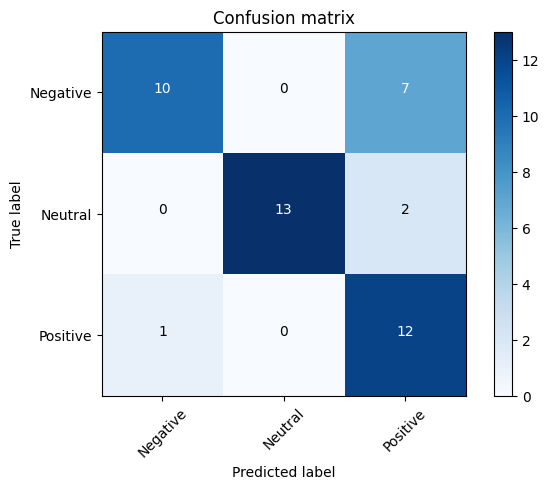

In [26]:
y_pred_rf = best_model_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plot_confusion_matrix(cm_rf, classes=['Negative', 'Neutral', 'Positive'])

Random Forest demonstrate comparable performance to Bernoulli Naive Bayes in classifying reviews

# SVM

In [36]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Fine-Tuned SVM
clf_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, verbose=0, n_jobs=-1)
best_model_svm = clf_svm.fit(X_train, y_train)
print("SVM - Best Parameters:", best_model_svm.best_params_)
print("SVM - Mean Accuracy:", best_model_svm.score(X_test, y_test))
best_model_svm = clf_svm.best_estimator_

SVM - Best Parameters: {'C': 1, 'kernel': 'linear'}
SVM - Mean Accuracy: 0.9555555555555556


Confusion matrix


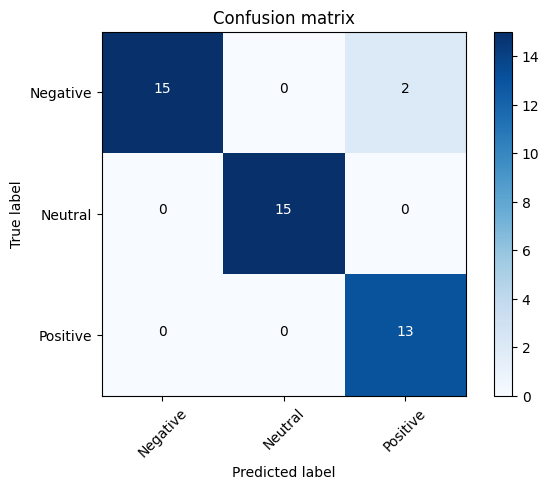

In [28]:
y_pred_svm = best_model_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, classes=['Negative', 'Neutral', 'Positive'])

SVM, like Logistic Regression, is a robust classifier for various types of reviews. However, it occasionally misclassifies negative reviews as positive. This suggests that the model might face challenges in distinguishing certain patterns within negative reviews.

In [38]:
def evaluate_model(model, X_test, y_test, model_name):
   
    y_pred = model.predict(X_test)

    # Calculate precision, recall, F1 score, and accuracy
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    return [model_name, precision, recall, f1, accuracy]

results = []

# Decision Tree
best_model_dt = clf_dt.best_estimator_
results.append(evaluate_model(best_model_dt, X_test, y_test, "Decision Tree"))

# KNN
best_model_knn = clf_knn.best_estimator_
results.append(evaluate_model(best_model_knn, X_test, y_test, "KNN"))

# Naive Bayes (BernoulliNB)
nb = BernoulliNB()
nb.fit(X_train, y_train)
results.append(evaluate_model(nb, X_test, y_test, "Naive Bayes (BernoulliNB)"))

# Logistic Regression
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
results.append(evaluate_model(logreg, X_test, y_test, "Logistic Regression"))

# Fine-Tuned SVM
best_model_svm = clf_svm.best_estimator_
results.append(evaluate_model(best_model_svm, X_test, y_test, "SVM"))

# Fine-Tuned Random Forest
best_model_rf = clf_rf.best_estimator_
results.append(evaluate_model(best_model_rf, X_test, y_test, "Random Forest"))

# Print the results using tabulate
headers = ["Model", "Precision", "Recall", "F1 Score", "Accuracy"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))


╒═══════════════════════════╤═════════════╤══════════╤════════════╤════════════╕
│ Model                     │   Precision │   Recall │   F1 Score │   Accuracy │
╞═══════════════════════════╪═════════════╪══════════╪════════════╪════════════╡
│ Decision Tree             │    0.716639 │ 0.70367  │   0.71248  │   0.711111 │
├───────────────────────────┼─────────────┼──────────┼────────────┼────────────┤
│ KNN                       │    0.759559 │ 0.607843 │   0.53773  │   0.644444 │
├───────────────────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Naive Bayes (BernoulliNB) │    0.889947 │ 0.840523 │   0.82259  │   0.822222 │
├───────────────────────────┼─────────────┼──────────┼────────────┼────────────┤
│ Logistic Regression       │    0.979365 │ 0.980392 │   0.977853 │   0.977778 │
├───────────────────────────┼─────────────┼──────────┼────────────┼────────────┤
│ SVM                       │    0.961481 │ 0.960784 │   0.955754 │   0.955556 │
├───────────────────────────

# LEARNING CURVE

A learning curve is a graphical representation that shows how a model's performance on a task changes over time or with more data. Specifically, a learning curve plots the model's performance (such as accuracy or error) on the training set and the validation set as a function of the amount of training data.

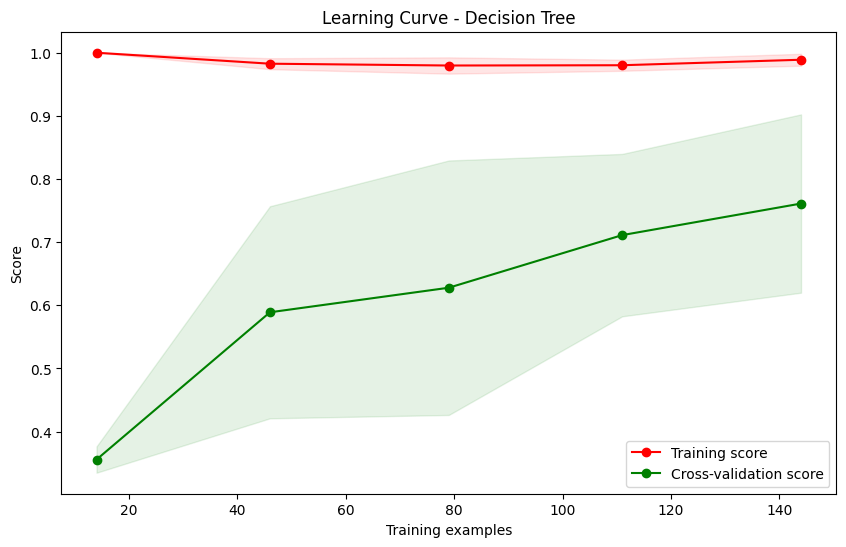

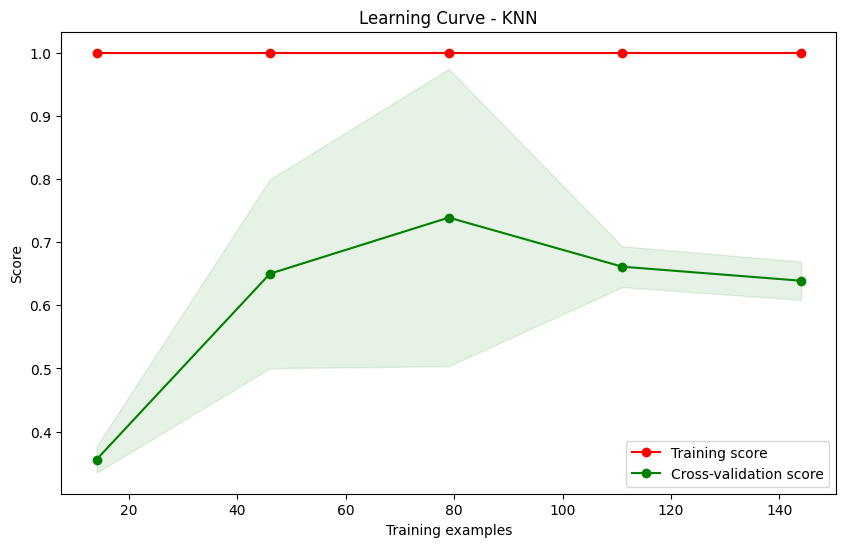

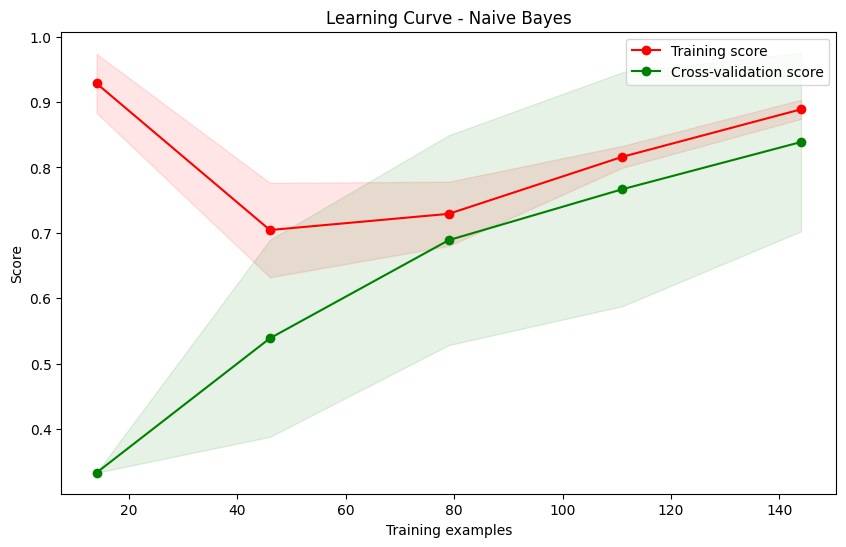

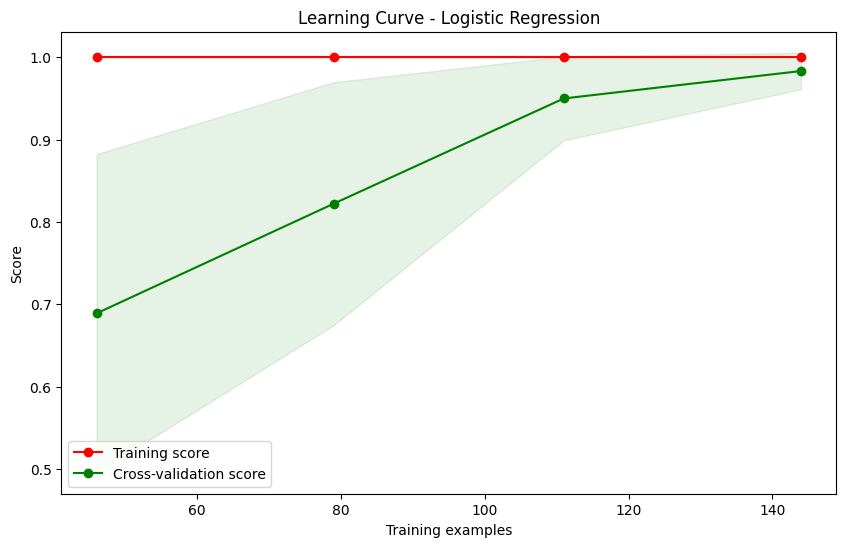

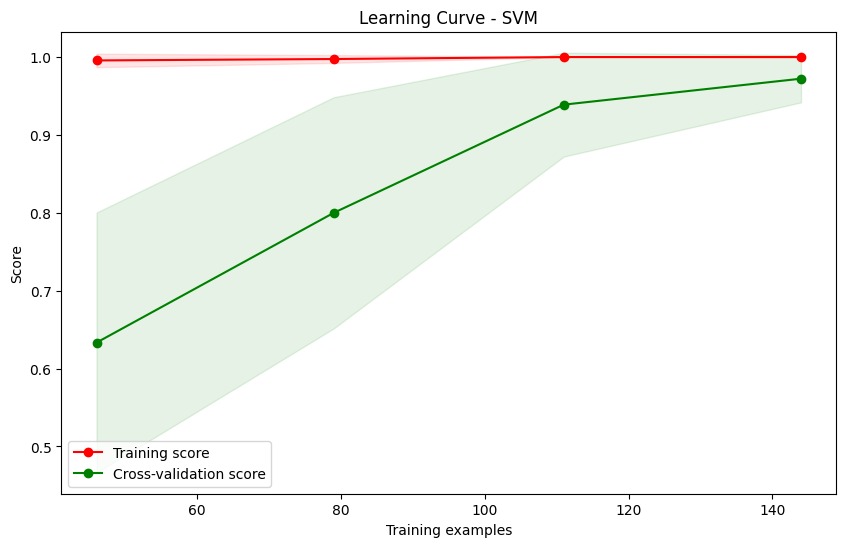

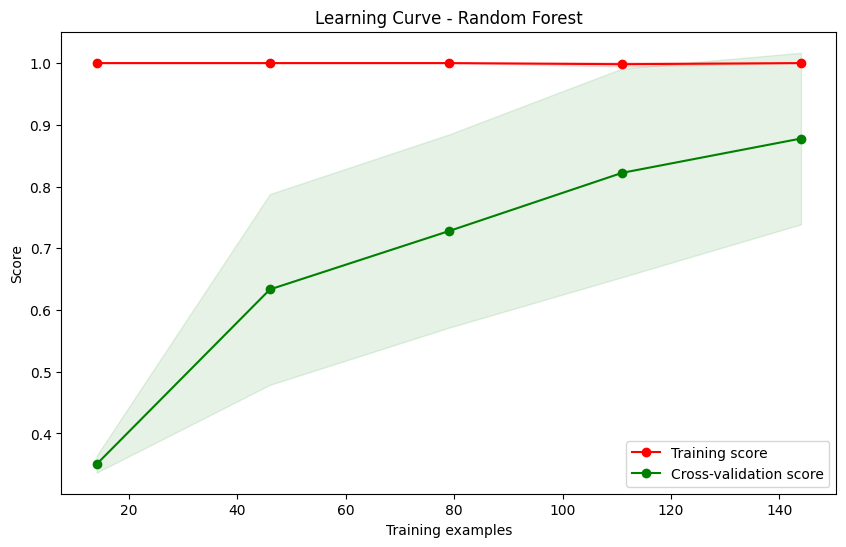

In [41]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a plot of the test and training learning curve.

    Parameters:
    - estimator: Your machine learning model
    - title: Title for the chart
    - X: Input features
    - y: Target variable
    - ylim: Tuple defining ymin and ymax for the plot
    - cv: Cross-validation strategy
    - n_jobs: Number of jobs to run in parallel
    - train_sizes: Array of training set sizes
    """

    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# List of models
models = [
    ("Decision Tree", best_model_dt),
    ("KNN", best_model_knn),
    ("Naive Bayes", nb),
    ("Logistic Regression", logreg),
    ("SVM", best_model_svm),
    ("Random Forest", best_model_rf),
]

# Plot learning curves for each model
for model_name, model in models:
    title = f"Learning Curve - {model_name}"
    plot_learning_curve(model, title, X_res, y_res, cv=5, n_jobs=-1)

plt.show()

# CONCLUSION

After fine-tuning the models, there is a noticeable improvement in the overall performance metrics. The following key points summarize the global impact:

Across various models, precision has generally improved. This indicates a reduction in false positives, enhancing the models' ability to correctly identify positive reviews.

The overall test accuracy of the models has seen a positive trend after fine-tuning. This suggests that the fine-tuned models perform better in making correct predictions across all classes.

The F1 score, which considers both precision and recall, has shown improvement. This signifies a better balance between correctly identifying positive instances and avoiding false positives and false negatives.

While some models have seen improvements in recall, others have experienced slight declines. The mixed impact on recall implies that fine-tuning has influenced how well the models capture all positive instances.

Each model responds uniquely to fine-tuning, with some demonstrating consistent improvements (e.g., Logistic Regression, Naive Bayes, SVM) and others exhibiting mixed outcomes (e.g., Decision Tree, KNN, Random Forest).

The trade-offs observed in certain models, such as Decision Tree and Random Forest, indicate that fine-tuning involves finding a balance between complexity and generalization.

The learning curve shows in a more clare way the metrics' scores, confirming that the most performing models are Logistic Regression, SVM and Naive Bayes.

In conclusion, the global trend suggests that the fine-tuned models perform better across various metrics; the most perfoming model is the Logistic Regression.